In [1]:
# COLLAPSE CELL
# AMsearch np.v*
#x = data['mass']
#x?

# from jupyterthemes import jtplot
# jtplot.style(theme='solarized')
# from jupyterlab_table import JSONTable
# JSONTable(df)

# from IPython.display import HTML, display

# from notebook.services.config import ConfigManager
# cm = ConfigManager().update('notebook', {'limit_output': 1000})

import better_exceptions
better_exceptions.MAX_LENGTH = None

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_squared_error

from pprint import pprint
import math
import statsmodels.stats as sms
import statsmodels.api as sm
import statsmodels.regression as smr
import scipy.stats as stats
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

# 04atplotlib inline
# %load_ext heat

plt.ion()
# plt.ioff()

# %heat

import os 
# dir_path = os.path.dirname(os.path.realpath(__file__))
cwd = os.getcwd()

# fig, ax = plt.subplots()
# ax.plot(x, y)

/Users/tomwong/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
boston = load_boston()
# House Prices
y = boston.target
# The other 13 features
x = boston.data

Do a train_test_split where train : test is 80 : 20. Set
random_state=1 so the exact same split can be replicated later.
All subsequent model selection will be carried out with the train set.

In [102]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2, random_state = 1)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

We are interested in comparing 3 classes of ML algorithms here:

- RandomForestRegressor
- AdaBoostRegressor
- GradientBoostingRegressor
Boosted decision trees (AdaBoost, GradientBoosting & others)
have been shown empirically to outperform RandomForest on average
(Table 4 - R. Caruana et. al.) in terms
of predictive power. The runtime for boosting algorithms, as you will
experience, is also competitive with random forest.

As a starting point, below are instantiations of the 3 classes of
algorithms. I have given you a set of hyperparameters for each
class. Do not worry about tuning the parameters for now, we will do a
GridSearch at the end of the exercise.

In [49]:
rf = RandomForestRegressor(n_estimators=100,
                            n_jobs=-1,
                            random_state=1)

gdbr = GradientBoostingRegressor(learning_rate=0.1,
                                  loss='ls',
                                  n_estimators=100,
                                  random_state=1)

abr = AdaBoostRegressor(DecisionTreeRegressor(),
                         learning_rate=0.1,
                         loss='linear',
                         n_estimators=100,
                         random_state=1)


4. Using `cross_val_score` in `sklearn`, define a function that 
   calculates the cross-validated train MSE and R2 for `AdaBoostRegressor`,
   `GradientBoostingRegressor`, `RandomForestRegressor`.

   **Your output should be similar to this (Do not worry if the numbers do
   not match up exactly):**

   ```
   RandomForestRegressor     Train CV | MSE: 9.865 | R2: 0.867
   GradientBoostingRegressor Train CV | MSE: 8.533 | R2: 0.885
   AdaBoostRegressor         Train CV | MSE: 9.663 | R2: 0.870
   ```

   Which of the models cross validates the best? Why is it inappropriate
   to make a judgement on the performance of the models
   based only on the evidence we have thus far?


In [106]:
# rf
# gdbr
# abr

k = 10
def cross_val(estimator, X_train, X_test, y_train, y_test, nfolds):
#     rf_fit = rf.fit(X_train,y_train)
#     gdbr_fit = gdbr.fit(X_train,y_train)
#     abr_fit = abr.fit(X_train,y_train)

    rf_y_hat_train_predicted = rf.predict(X_train)

    rf_score_mse = cross_val_score(rf, X_train, y_train, scoring='mean_squared_error', n_jobs=-1).mean()

    # rf_score_mse = cross_val_score(rf, x,y, scoring='mean_squared_error').mean()
    rf_score_r2 = cross_val_score(rf, X_train, y_train, scoring='r2', n_jobs=-1).mean()

#     rf_score_mse
#     rf_score_r2
    return rf_score_mse, rf_score_r2

cross_val(rf, X_train, X_test, y_train, y_test, k)



/Users/tomwong/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/tomwong/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
/Users/tomwong/anaconda3/lib/python3.6/site-packages/sklearn/metrics/scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)


(-10.320121093569186, 0.8691052879724385)


5. Define a new instance of `GradientBoostingRegressor` with the exact same
   hyperparameters as above, except change the `learning_rate` to `1`
   (instead of `0.1`). Calculate the cross-validated train MSE.
    What do you notice?


6) We're going to make a plot to help us understand the impact of the learning rate
   and the improvements in error after each iteration of the boosting.
   
   [`staged_predict`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor.staged_predict) is a method in both
   `GradientBoostingRegressor` and `AdaBoostRegressor`. It allows us to get
   predictions from the estimator after each iteration of the boosting.
   
   Using
   `stage_predict`, define a function `stage_score_plot` that calculates the test and train
   MSE from each estimator. Do the calculations for `GradientBoostingRegressor`
   with `learning_rate=1` and `learning_rate=0.1`
   
   And get a result which looks like this:

   ![stage_score_plot](images/stage_score_plot.png)
   
   In order to get the labels for the plot, you can use `model.__class__.__name__` to get the model name and `model.learning_rate` to get the learning rate.


7) Use your `stage_score_plot` function to make a plot that shows the error
   for gradient boosting with a learning rate of 0.1 and 1.

   Since you are comparing two models and we're showing both the training and
   test error, you should have 4 lines on your graph.


In [42]:
# not working - get_optimal_n_estimators
def get_optimal_n_estimators(model, X_new, y_new):
        validation_loss = np.zeros(
        model.get_params('n_estimators'))
        for i, preds in enumerate(model.staged_predict(X_new)):
            validation_loss[i] = model.loss_(preds, y_new)
        optimal_tree = np.argmin(validation_loss)
        optimal_loss = validation_loss[optimal_tree]
        return optimal_tree, optimal_loss
    
gdbr = GradientBoostingRegressor(learning_rate=0.1,
                                  loss='ls',
                                  n_estimators = 100,
                                  random_state=1)
get_optimal_n_estimators(gdbr, X_test, y_test)

TypeError: expected sequence object with len >= 0 or a single integer

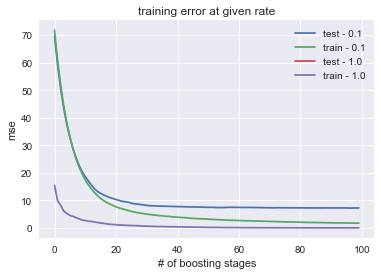

In [96]:
# test
def stage_score_plot(estimator, X_train, y_train, X_test, y_test):
    '''
    Parameters: estimator: GradientBoostingRegressor or AdaBoostRegressor
       a         X_train: 2d numpy array
                y_train: 1d numpy array
                X_test: 2d numpy array
                y_test: 1d numpy array

    Returns: A plot of the number of iterations vs the MSE for the model for
    both the training set and test set.
    '''

   #### YOUR CODE HERE ####
    gdbr = GradientBoostingRegressor(learning_rate=0.1,
                                     loss='ls',
                                     n_estimators=100,
                                     random_state=1,
#                                      max_depth=3,
#                                      subsample=1.0,
#                                      min_samples_split=2,
#                                      min_samples_leaf=1,
#                                      min_weight_fraction_leaf=0.0     
                                    )
    
    fig, ax = plt.subplots()
    
    model = gdbr.fit(X_train, y_train)
    gdbr_predict = gdbr.predict(X_test)

#     rf_score_mse = cross_val_score(rf, X_train,rf_y_hat_test_predicted, scoring='mean_squared_error').mean()

    gb_test = []
    gb_train = []
    for preds in model.staged_predict(X_test):
        # do what you would like with the different stages
        gb_test.append(mean_squared_error(y_test, preds))
#     return plt.plot(list(range(10,40)), gb_test)

    for train_preds in model.staged_predict(X_train):
        gb_train.append(mean_squared_error(y_train, train_preds))

    plt.xlabel('# of boosting stages')
    plt.ylabel('mse')
    plt.title('training error at given rate');
    plt.plot(gb_test, label = "test - 0.1")
    plt.plot(gb_train, label = "train - 0.1")
    
    gdbr_1 = GradientBoostingRegressor(learning_rate=1,
                                     loss='ls',
                                     n_estimators=100,
                                     random_state=1,
#                                      max_depth=3,
#                                      subsample=1.0,
#                                      min_samples_split=2,
#                                      min_samples_leaf=1,
#                                      min_weight_fraction_leaf=0.0     
                                    )
    
    model_1 = gdbr_1.fit(X_train, y_train)

#     rf_score_mse = cross_val_score(rf, X_train,rf_y_hat_test_predicted, scoring='mean_squared_error').mean()

    gb_test_1 = []
    gb_train_1 = []
    for preds_1 in model_1.staged_predict(X_test):
        # do what you would like with the different stages
        gb_test.append(mean_squared_error(y_test, preds_1))
#     return plt.plot(list(range(10,40)), gb_test)

    for train_preds in model_1.staged_predict(X_train):
        gb_train_1.append(mean_squared_error(y_train, train_preds))

    plt.plot(gb_test_1, label = "test - 1.0")
    plt.plot(gb_train_1, label = "train - 1.0")
    
    return 
        
        

stage_score_plot(gdbr, X_train, y_train, X_test, y_test)
plt.legend()
plt.show()

8) Given your plot, explain the behavior of the test / train curves
   for the two (0.1 and 1) learning rates. With a lower learning rate (0.1),
   what is necessary to obtain a low test error?



9. Using the `stage_score_plot` function, make a plot like you did above of
    the MSE for `GradientBoostingRegressor` with `learning_rate=0.1`.

    Add a horizontal line to indicate where the `RandomForestRegressor` test
   error is at.

   Your plot should look something like this:

   ![gradient boosting](images/gradboost.png)

   a. How many iterations does it take until Gradient Boosting beats Random Forest?

10. Make a similar plot for `AdaBoost`. Again have the `learning_rate=0.1`
    and add a horizontal line for the Random Forest test error.

    Don't expect AdaBoost to be as smooth as the Gradient Boosting graph.

    a. How many iterations does it take till AdaBoost beats Random Forest?

11. As seen above when we compared two learning rates, suboptimal hyperparameters
    can give rise to higher error
    (MSE). Therefore, we aim to search for the set of hyperparameters that
    would give us the lowest cross-validated train error. The search of these
    hyperparameters is known as grid-search. For each hyperparameter, a set
    of values are specified. The combination of the hyperparameters at different
    values will constitute the search space. We try each possible combination
    of parameters and find the combination which minimizes error.

    Use `GridSearchCV` for to find the best `RandomForestRegressor`
    and `GradientBoostRegressor` models respectively.
    Remember to specify `n_jobs=-1` in `GridSearchCV` to use all the cores of your
    machine and speed up your search.

    Here are some values to start out with trying for hyperparameters for Random Forest:

    ```python

    random_forest_grid = {'max_depth': [3, None],
                          'max_features': ['sqrt', 'log2', None],
                          'min_samples_split': [2, 4],
                          'min_samples_leaf': [1, 2, 4],
                          'bootstrap': [True, False],
                          'n_estimators': [10, 20, 40, 80],
                          'random_state': [1]}

    rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                                 random_forest_grid,
                                 n_jobs=-1,
                                 verbose=True,
                                 scoring='mean_squared_error')
    rf_gridsearch.fit(X_train, y_train)

    print "best parameters:", rf_gridsearch.best_params_

    best_rf_model = rf_gridsearch.best_estimator_
    ```

    Feel free to change it to try a different set of parameters.

    Note that this will take about 3-5 minutes to run. The total number of combinations is:
    `2 * 3 * 2 * 3 * 2 * 4 * 1 = 288`. We are trying each of these possibilities!

    a. What are the optimal parameters?

    b. What is the MSE you get on the test set with these parameters?

    c. How does this compare with the MSE with the default parameters?

12. Go through the same process for `GradientBoosting`. Try several values for
    these hyperparameters:

    * `learning_rate`
    * `max_depth`
    * `min_samples_leaf`
    * `max_features`
    * `n_estimators`
    
    If you're unsure what values to include, take a look at sklearn's default. Include the default value and at least 
    one value less than and greater than the default value. Here's the [docs on Gradient Boosting](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html#sklearn.ensemble.GradientBoostingClassifier) where you can see the defaults.
    If you want a set of starting parameters, [here](https://gist.github.com/pprett/3989337#file-grid_search-py-L115) is
    a reference.

    a. What are the parameters that give the optimal model?

    b. How does the MSE for this model compare with the original MSE you got with Gradient Boosting
    before tuning the parameters?

13. **[Extra Credit]** Go through the same process for `AdaBoost`. Note you need to define different hyperparameters
    in the base estimator to perform the gridsearch. This will also take much longer to run,
    so feel free to just leave it running after you figure out some parameters to try.


In [22]:
import sklearn.datasets
iris = datasets.load_iris()
from sklearn import svm
clf = svm.SVC(kernel='linear', C=1)
clf_scores = cross_val_score(clf, iris.data, iris.target, cv=5)
clf_scores

array([0.96666667, 1.        , 0.96666667, 0.96666667, 1.        ])